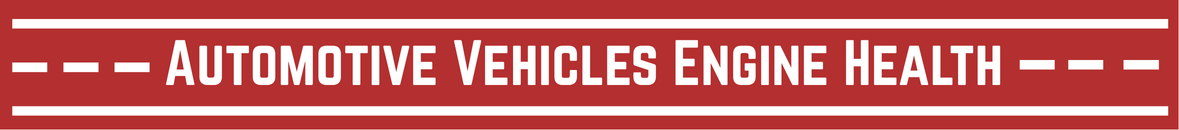

In [3]:
# Cell 1: Import Libraries and Setup
# ===================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully")

Libraries imported successfully


---

# Data Loading and Initial Inspection

In [37]:
# Cell 2: Data Loading and Initial Inspection
# ===========================================
# Load the dataset
df = pd.read_csv('/kaggle/input/automotive-vehicles-engine-health-dataset/engine_data.csv')

print("Dataset Shape:", df.shape)
print("BASIC DATASET INFORMATION")

# Display basic info
df.info()

Dataset Shape: (19535, 7)
BASIC DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [8]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [10]:
print("\nLast 5 rows:")
df.tail()


Last 5 rows:


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1
19534,504,3.775246,3.962480,2.038647,75.564313,80.421421,1


In [11]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition']


---

# Data Quality Assessment

In [13]:
# Cell 3: Data Quality Assessment
# ===============================

print("DATA QUALITY ASSESSMENT")


# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")

# Data types
print(f"\nData types:")
print(df.dtypes)

# Check for infinite values
print(f"\nInfinite values check:")
for col in df.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        print(f"{col}: {inf_count} infinite values")

DATA QUALITY ASSESSMENT
Missing Values:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Total missing values: 0

Duplicate rows: 0

Data types:
Engine rpm            int64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int64
dtype: object

Infinite values check:


---

# Statistical Summary

In [14]:
# Cell 4: Statistical Summary
# =================================
print("STATISTICAL SUMMARY")

# Basic statistics
print("Descriptive Statistics:")
print(df.describe())

# Additional statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns: {list(numeric_cols)}")

# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in numeric_cols:
    skewness = stats.skew(df[col].dropna())
    kurtosis = stats.kurtosis(df[col].dropna())
    print(f"{col}: Skewness = {skewness:.3f}, Kurtosis = {kurtosis:.3f}")

STATISTICAL SUMMARY
Descriptive Statistics:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990

---

# Engine Condition Analysis

TARGET VARIABLE ANALYSIS
Target variable identified: Engine Condition
Target distribution:
Engine Condition
1    12317
0     7218
Name: count, dtype: int64

Target proportions:
Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64


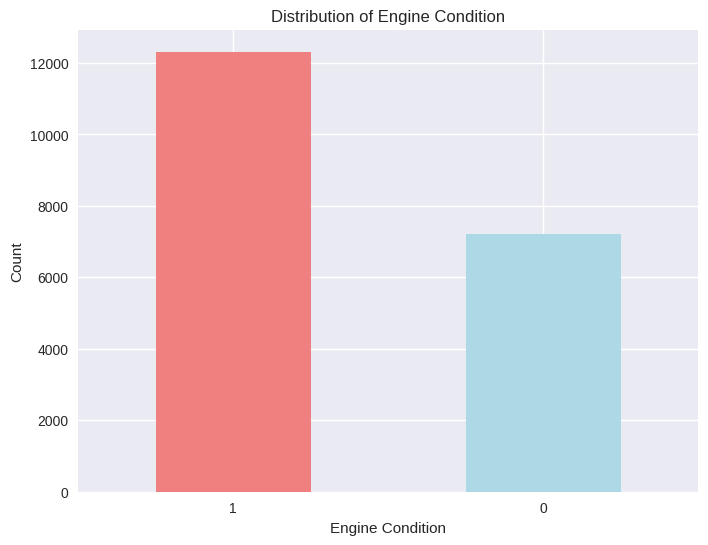

In [17]:
# Cell 5: Target Variable Analysis
# ================================
print("TARGET VARIABLE ANALYSIS")

target_col = "Engine Condition"


if target_col:
    print(f"Target variable identified: {target_col}")
    print(f"Target distribution:")
    print(df[target_col].value_counts())
    print(f"\nTarget proportions:")
    print(df[target_col].value_counts(normalize=True))
    
    # Plot target distribution
    plt.figure(figsize=(8, 6))
    df[target_col].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
    plt.title(f'Distribution of {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


---

# Correlation Analysis

CORRELATION ANALYSIS
Correlation Matrix:
                  Engine rpm  Lub oil pressure  Fuel pressure  \
Engine rpm          1.000000          0.025046      -0.001571   
Lub oil pressure    0.025046          1.000000       0.043790   
Fuel pressure      -0.001571          0.043790       1.000000   
Coolant pressure   -0.024979         -0.009357       0.033264   
lub oil temp        0.052134         -0.008031      -0.025338   
Coolant temp        0.029560         -0.060906      -0.042986   
Engine Condition   -0.268201          0.060904       0.116259   

                  Coolant pressure  lub oil temp  Coolant temp  \
Engine rpm               -0.024979      0.052134      0.029560   
Lub oil pressure         -0.009357     -0.008031     -0.060906   
Fuel pressure             0.033264     -0.025338     -0.042986   
Coolant pressure          1.000000     -0.020761      0.033451   
lub oil temp             -0.020761      1.000000      0.072914   
Coolant temp              0.033451      0.

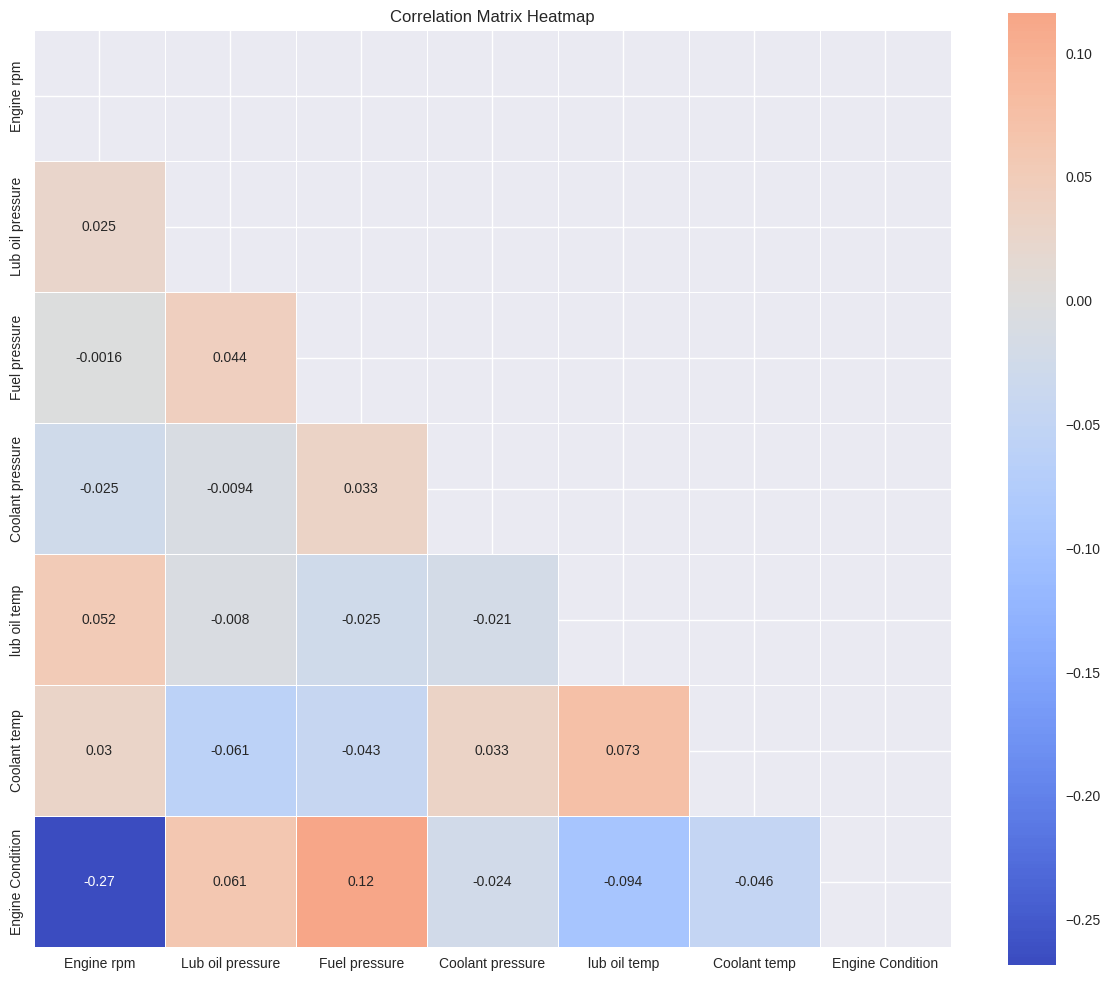

In [21]:
# Cell 6: Correlation Analysis
# ============================
print("CORRELATION ANALYSIS")

# Calculate correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True,
           linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

---

# Distribution Analysis

DISTRIBUTION ANALYSIS


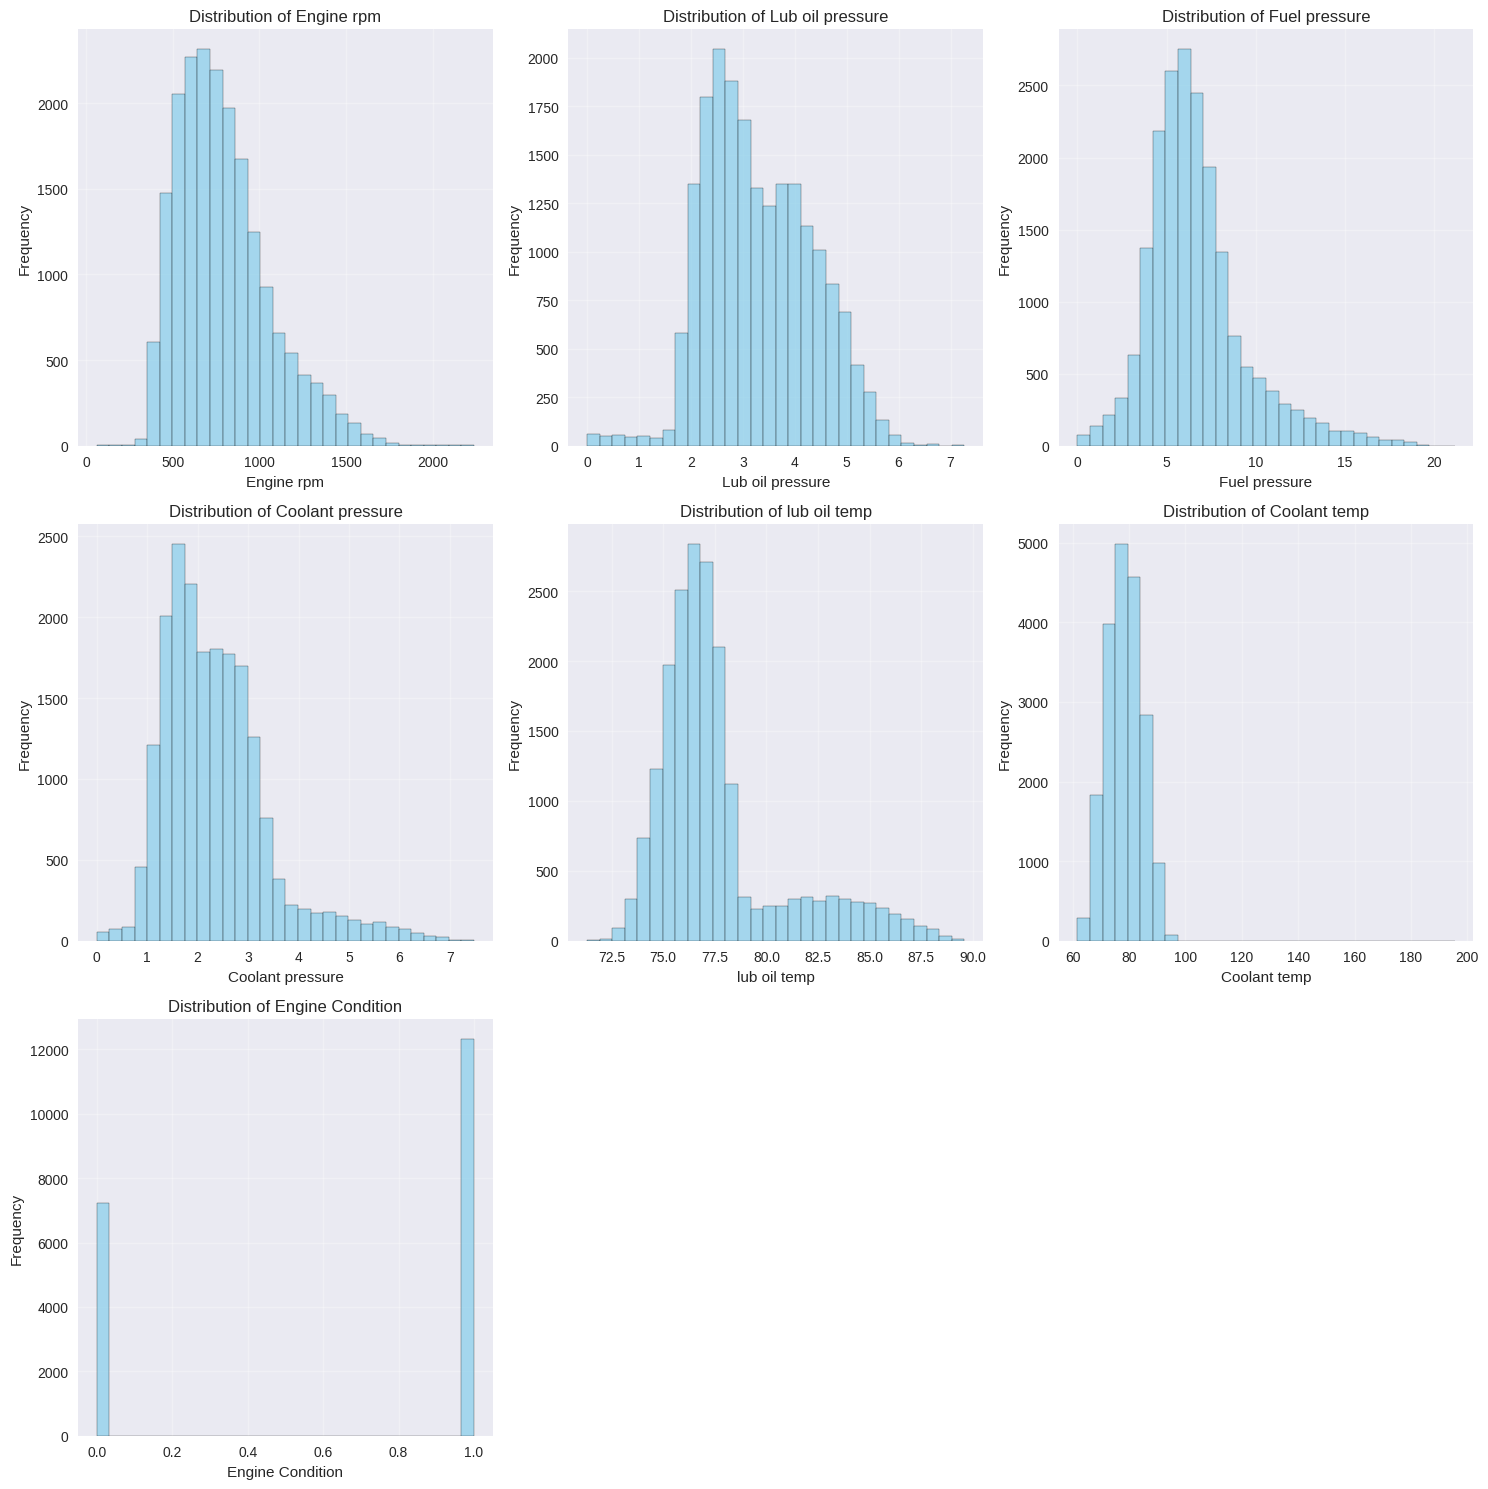

In [23]:
# Cell 7: Distribution Analysis
# =============================
print("DISTRIBUTION ANALYSIS")

# Plot distributions of all numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

---

# Outlier Detection and Analysis

## Box Plot Method

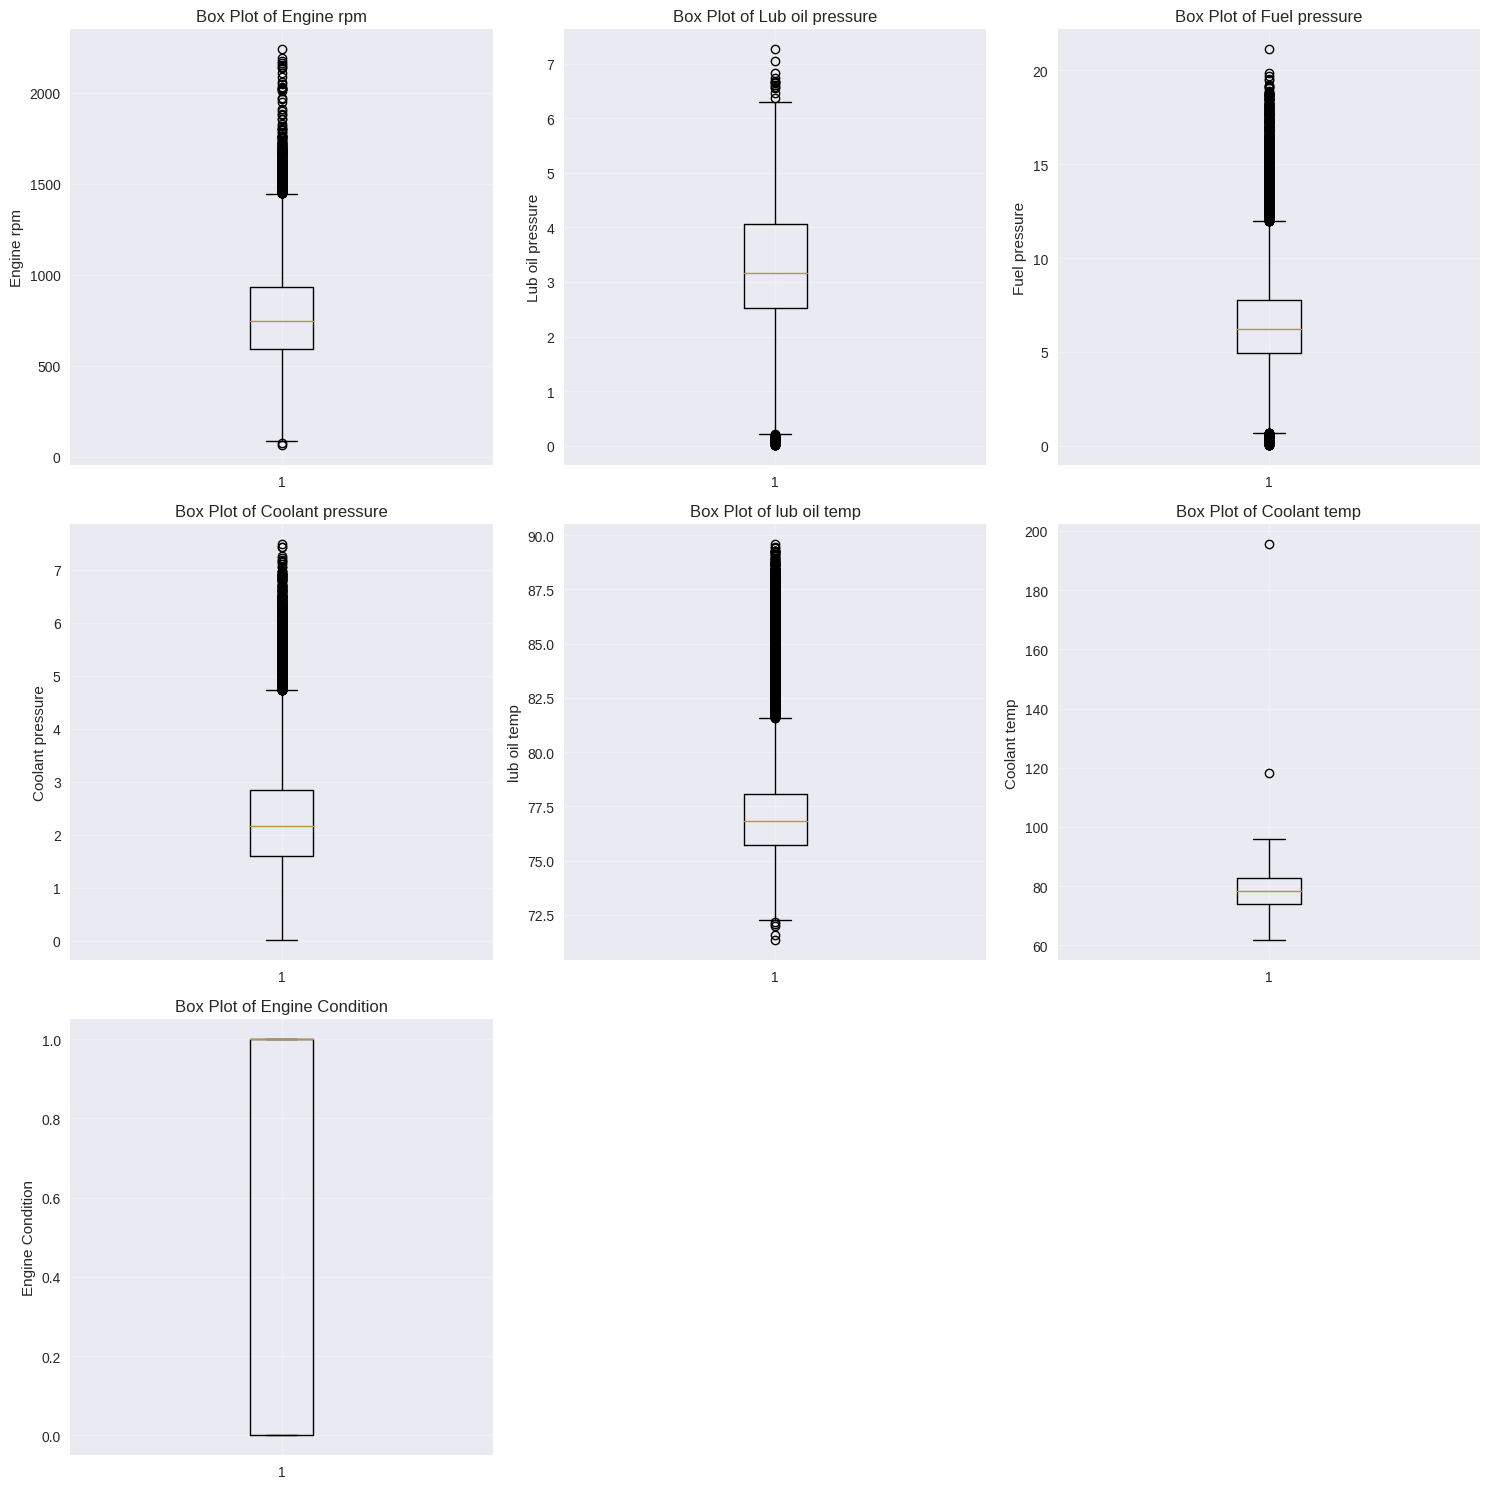

In [24]:
# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## IQR Method

In [25]:
# Cell 8: Outlier Detection and Analysis
# ======================================
print("OUTLIER DETECTION AND ANALYSIS")

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for each numeric column
outlier_summary = {}
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

# Create outlier summary DataFrame
outlier_df = pd.DataFrame(outlier_summary).T
print("\nOutlier Summary:")
print(outlier_df)

OUTLIER DETECTION AND ANALYSIS
Engine rpm: 464 outliers (2.38%)
Lub oil pressure: 66 outliers (0.34%)
Fuel pressure: 1135 outliers (5.81%)
Coolant pressure: 785 outliers (4.02%)
lub oil temp: 2617 outliers (13.40%)
Coolant temp: 2 outliers (0.01%)
Engine Condition: 0 outliers (0.00%)

Outlier Summary:
                   count  percentage  lower_bound  upper_bound
Engine rpm         464.0    2.375224    81.500000  1445.500000
Lub oil pressure    66.0    0.337855     0.214130     6.359957
Fuel pressure     1135.0    5.810084     0.674755    11.987104
Coolant pressure   785.0    4.018428    -0.272095     4.721400
lub oil temp      2617.0   13.396468    72.207440    81.590241
Coolant temp         2.0    0.010238    60.365435    96.445397
Engine Condition     0.0    0.000000    -1.500000     2.500000


---

# Feature Engineering and Analysis

In [26]:
# Cell 9: Feature Engineering and Analysis
# ========================================
print("FEATURE ENGINEERING AND ANALYSIS")

# Create new features based on domain knowledge
df_engineered = df.copy()

# Example feature engineering (adjust column names based on actual data)
if 'Engine rpm' in df.columns or 'rpm' in df.columns:
    rpm_col = 'Engine rpm' if 'Engine rpm' in df.columns else 'rpm'
    # RPM categories
    df_engineered['rpm_category'] = pd.cut(df_engineered[rpm_col], 
                                         bins=[0, 800, 1200, 1800, float('inf')], 
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# Temperature difference (if applicable)
temp_cols = [col for col in df.columns if 'temp' in col.lower()]
if len(temp_cols) >= 2:
    df_engineered['temp_difference'] = df_engineered[temp_cols[0]] - df_engineered[temp_cols[1]]

# Pressure ratio (if applicable)
pressure_cols = [col for col in df.columns if 'pressure' in col.lower()]
if len(pressure_cols) >= 2:
    df_engineered['pressure_ratio'] = df_engineered[pressure_cols[0]] / (df_engineered[pressure_cols[1]] + 1e-6)

print("New features created:")
new_features = [col for col in df_engineered.columns if col not in df.columns]
print(new_features)

FEATURE ENGINEERING AND ANALYSIS
New features created:
['rpm_category', 'temp_difference', 'pressure_ratio']


---

# Bivariate Analysis

## Pairplots

BIVARIATE ANALYSIS


<Figure size 1500x1200 with 0 Axes>

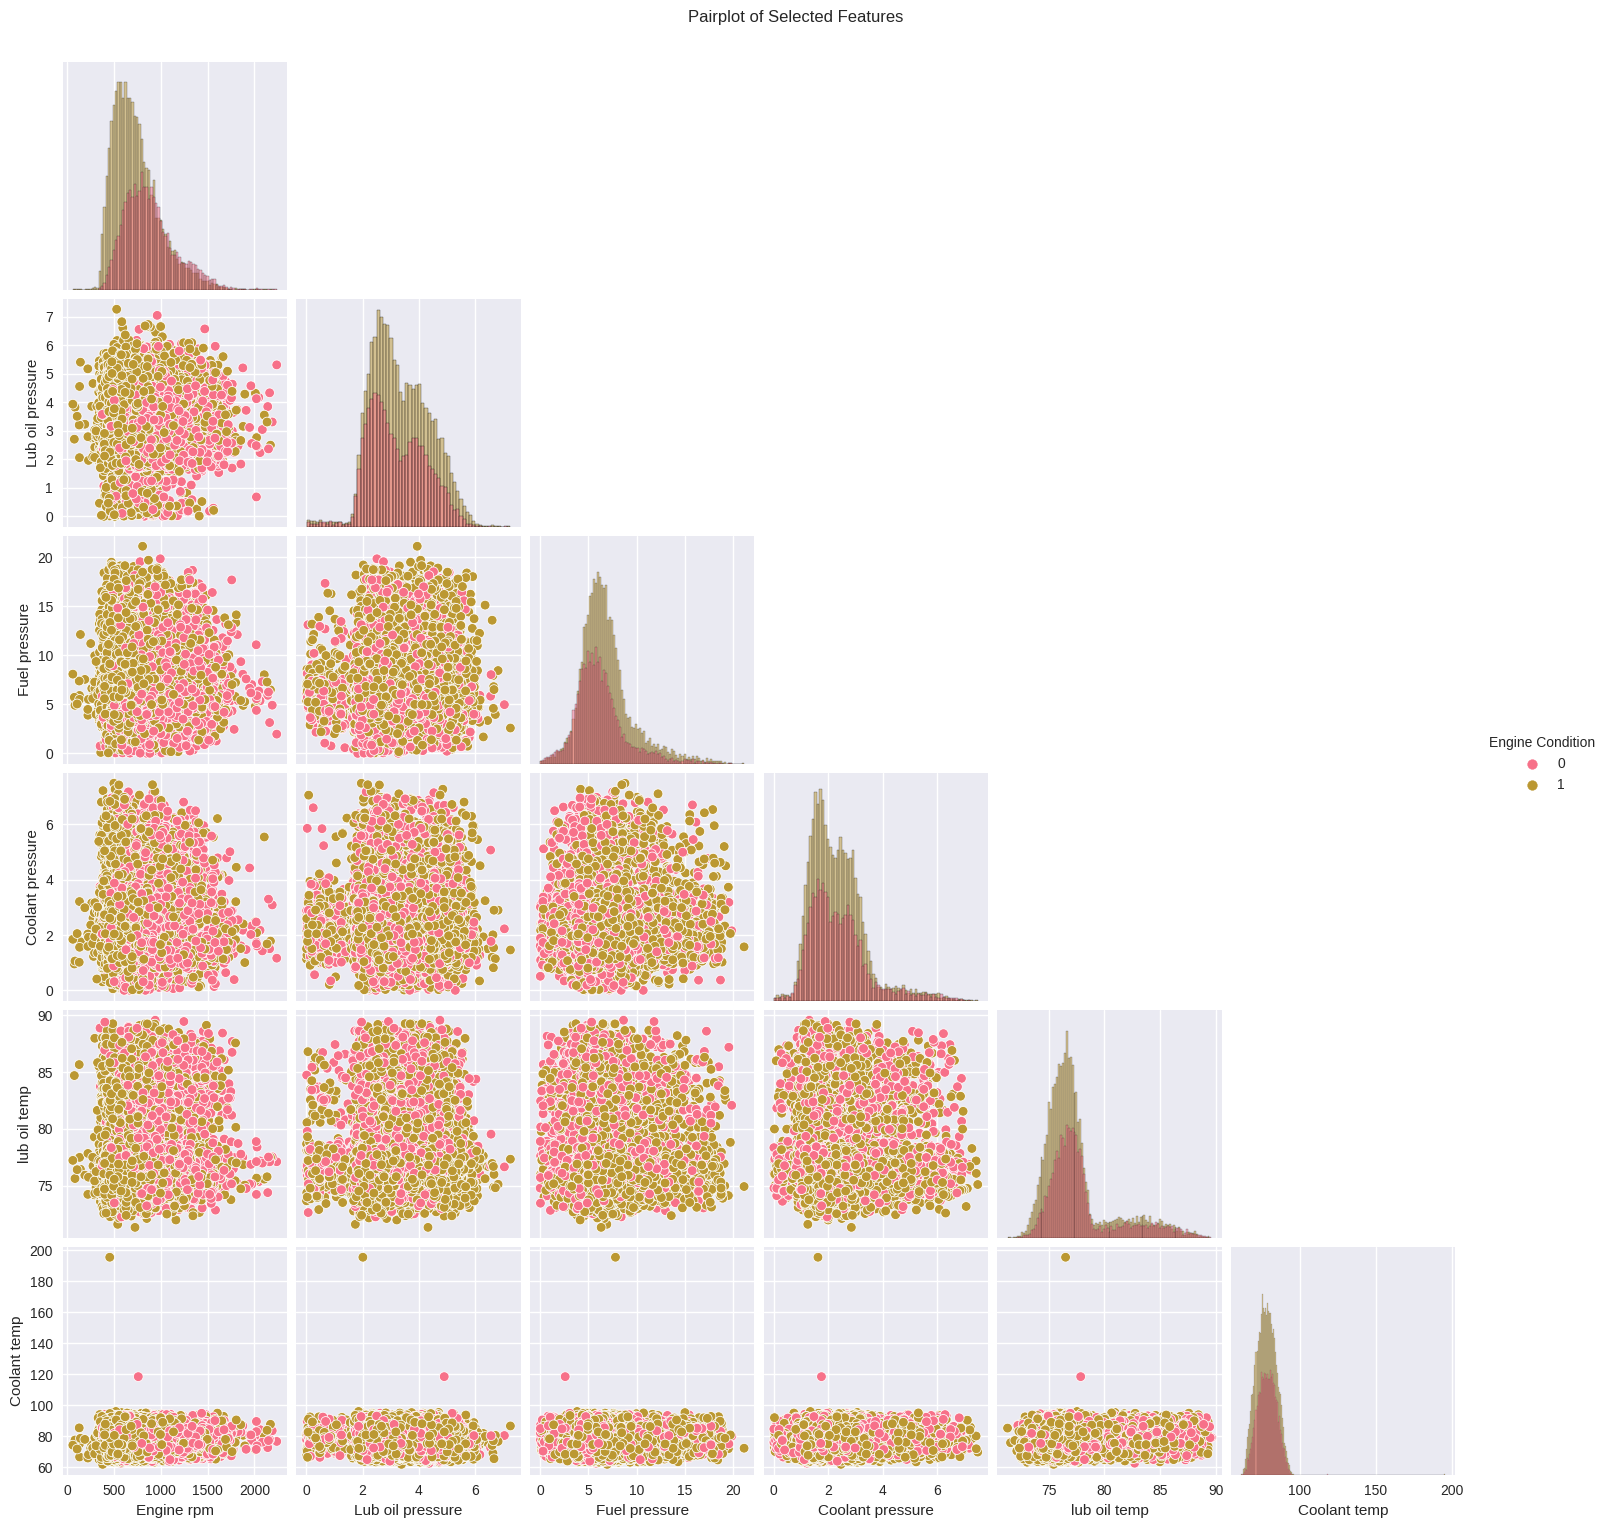

In [39]:
# Cell 10: Bivariate Analysis
# ===========================
print("BIVARIATE ANALYSIS")

if target_col:
    # Create pairplot with target variable
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_features:
        numeric_features.remove(target_col)
    
    selected_features = numeric_features[:] + [target_col]
    
    plt.figure(figsize=(15, 12))
    sns.pairplot(df[selected_features], hue=target_col, diag_kind='hist', corner=True)
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()

## Violin Plots

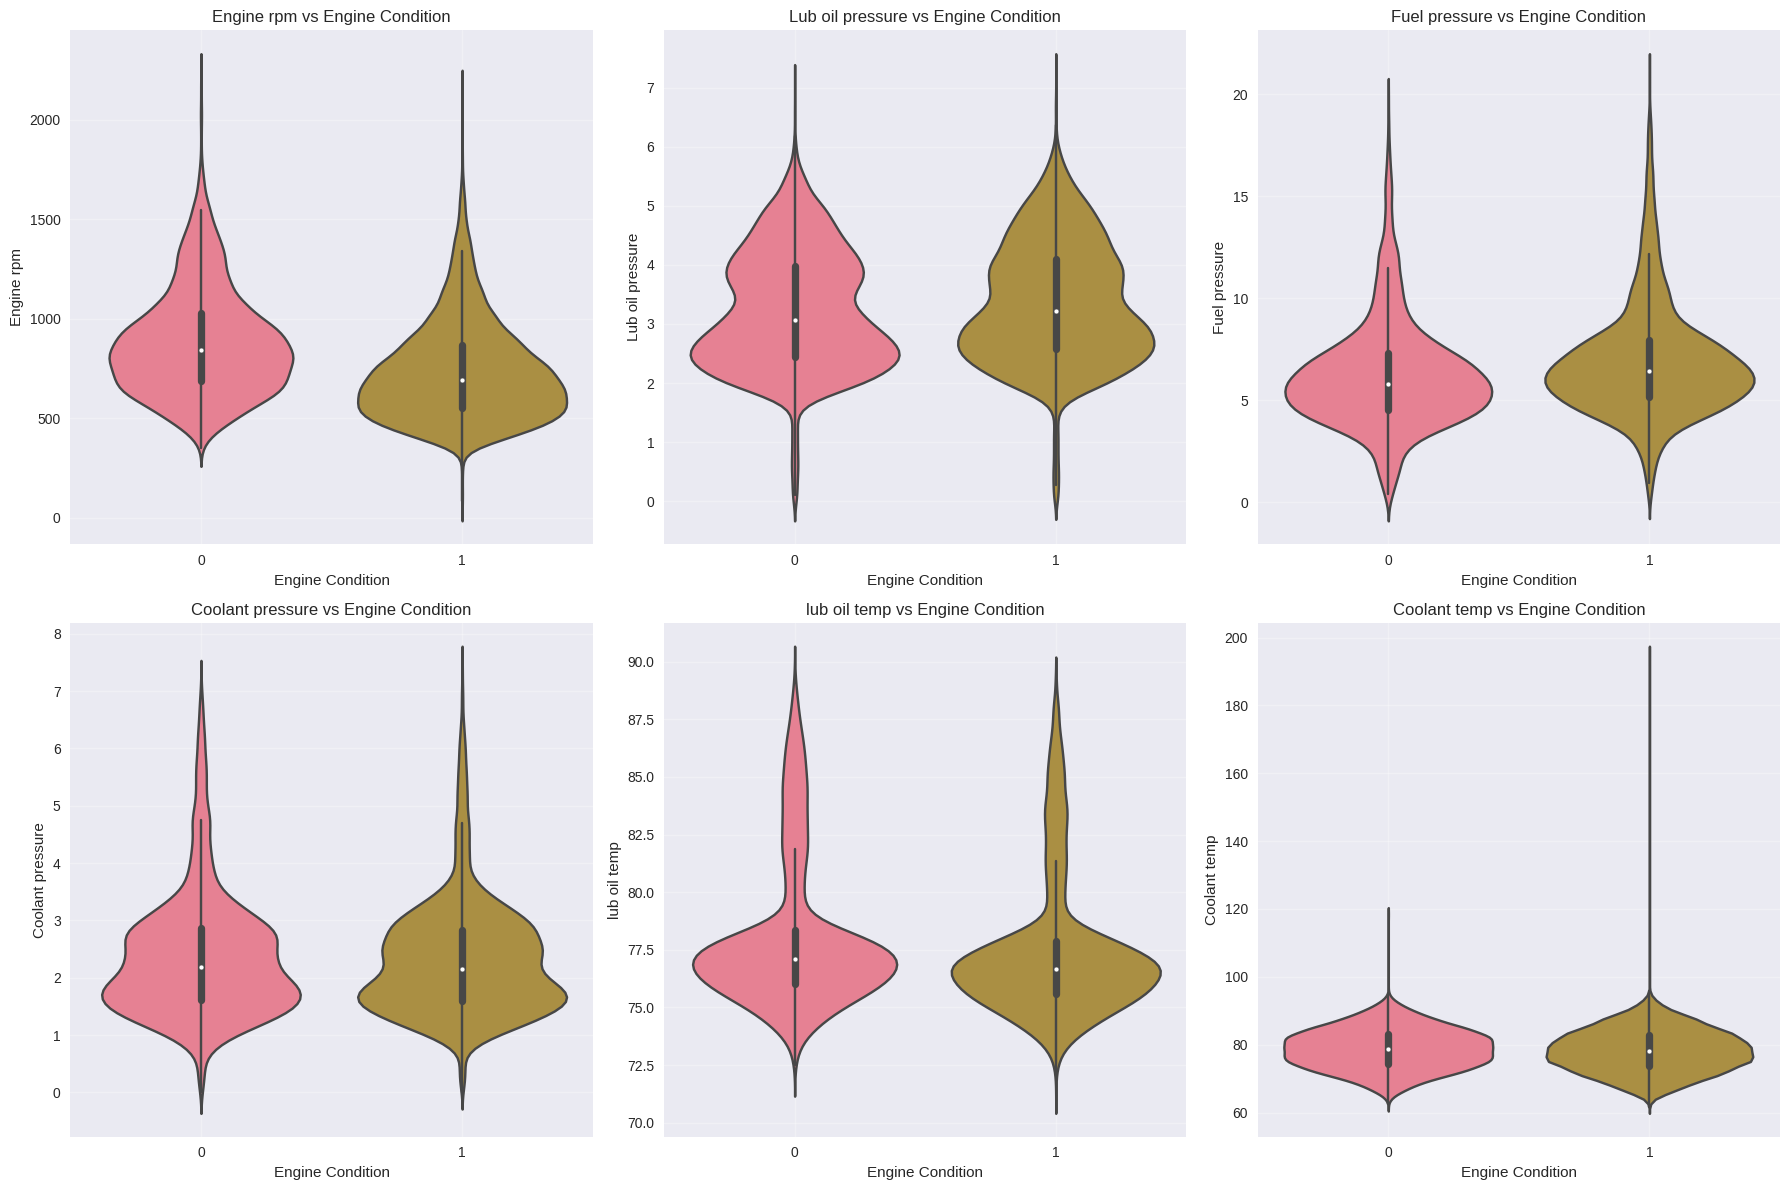

In [29]:
    # Cell 11: Violin plots for each feature vs target
    n_features = len(numeric_features[:6])  # Limit to 6 features
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, feature in enumerate(numeric_features[:6]):
        if i < len(axes):
            sns.violinplot(data=df, x=target_col, y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} vs {target_col}')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

---

# 3D Scatter Plot and Parallel Coordinates Plot

In [33]:
# Cell 12: Advanced Visualizations
# =================================
print("VISUALIZATIONS")

# Interactive plots using Plotly
if target_col:
    # 3D scatter plot
    if len(numeric_cols) >= 3:
        fig = px.scatter_3d(df, 
                           x=numeric_cols[0], 
                           y=numeric_cols[1], 
                           z=numeric_cols[2],
                           color=target_col,
                           title='3D Scatter Plot of Engine Parameters')
        fig.show()
    
    # Parallel coordinates plot
    fig = px.parallel_coordinates(df.sample(1000) if len(df) > 1000 else df,
                                 color=target_col,
                                 dimensions=numeric_cols[:6],  # Limit to 6 dimensions
                                 title='Parallel Coordinates Plot')
    fig.show()

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Feature Distributions', 'Correlation Heatmap', 
                   'Box Plots', 'Target Distribution'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

plt.show()

VISUALIZATIONS


---

# Feature Importance Analysis

FEATURE IMPORTANCE ANALYSIS
Feature Importance Ranking:
            feature  importance
0        Engine rpm    0.224203
2     Fuel pressure    0.166938
4      lub oil temp    0.157740
1  Lub oil pressure    0.153127
5      Coolant temp    0.149587
3  Coolant pressure    0.148405


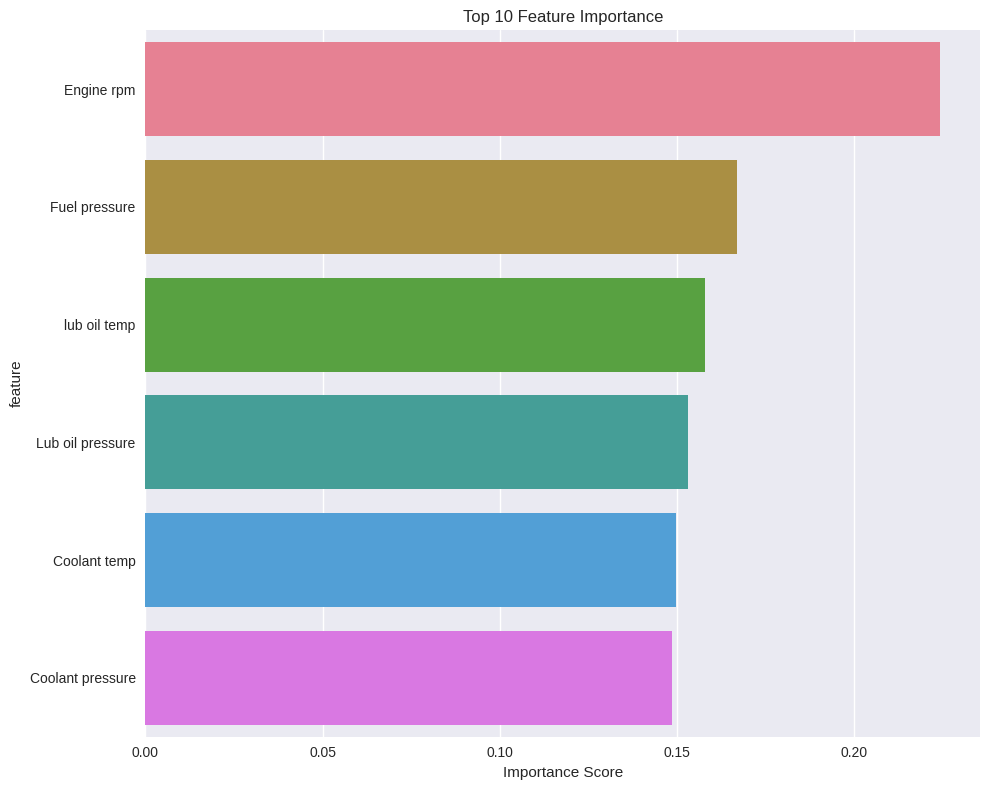

In [36]:
# Cell 13: Feature Importance Analysis
# ====================================
print("FEATURE IMPORTANCE ANALYSIS")

if target_col and df[target_col].dtype in ['int64', 'float64', 'bool']:
    # Prepare data for machine learning
    X = df.select_dtypes(include=[np.number]).drop(columns=[target_col])
    y = df[target_col]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest for feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance Ranking:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()